<a href="https://colab.research.google.com/github/Ishita95-harvad/Energy-Efficiency-and-Renewable-Generation-through-Data-Analysis-in-the-Power-Sector.ipynb/blob/main/EDA_SmartGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 EDA for Smart Grid Energy Data
This notebook performs exploratory data analysis (EDA) on synthetic smart grid datasets for region demand, solar/wind generation, and weather conditions.

## Load data

### Subtask:
Load the data from the specified file path into a pandas DataFrame.


**Reasoning**:
The subtask is to mount Google Drive. The necessary command to mount Google Drive in a Colab environment is provided in the instructions.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reasoning**:
Attempt to load the data from the specified file path into a pandas DataFrame.



In [ ]:
file_path = "/content/drive/MyDrive/data.csv"
try:
    df_data = pd.read_csv(file_path)
    display(df_data.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    df_data = None

Error: The file was not found at /content/drive/MyDrive/data.csv


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Simulate time-series data for one week (15-min intervals)
timestamps = pd.date_range(start='2024-01-01', periods=96*7, freq='15min')
np.random.seed(42)
data = pd.DataFrame({
    'timestamp': timestamps,
    'region_demand': np.random.normal(500, 50, size=len(timestamps)),
    'solar_gen': np.clip(np.sin(np.linspace(0, 14*np.pi, len(timestamps))) * 300 + np.random.normal(0, 30, len(timestamps)), 0, None),
    'wind_gen': np.clip(np.random.normal(150, 40, len(timestamps)), 0, None),
    'temperature': np.random.normal(30, 5, size=len(timestamps))
})

In [41]:
# Feature Engineering
data['hour'] = data['timestamp'].dt.hour
data['demand_variance'] = data['region_demand'].rolling(window=4).std().bfill()
data['moving_avg_demand'] = data['region_demand'].rolling(window=4).mean().bfill()
data['weather_score'] = data['temperature'] + 0.1 * data['wind_gen']

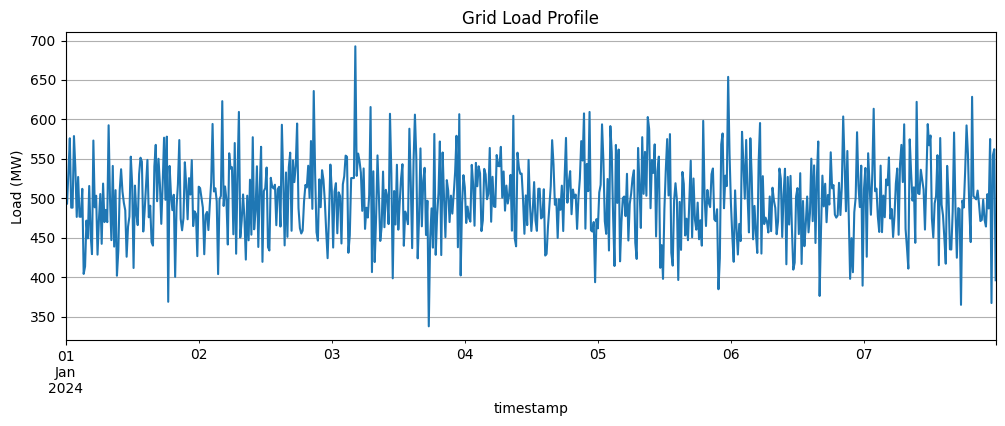

In [ ]:
# Load Profile
plt.figure(figsize=(12, 4))
data.set_index('timestamp')['region_demand'].plot(title="Grid Load Profile")
plt.ylabel("Load (MW)")
plt.grid()
plt.show()

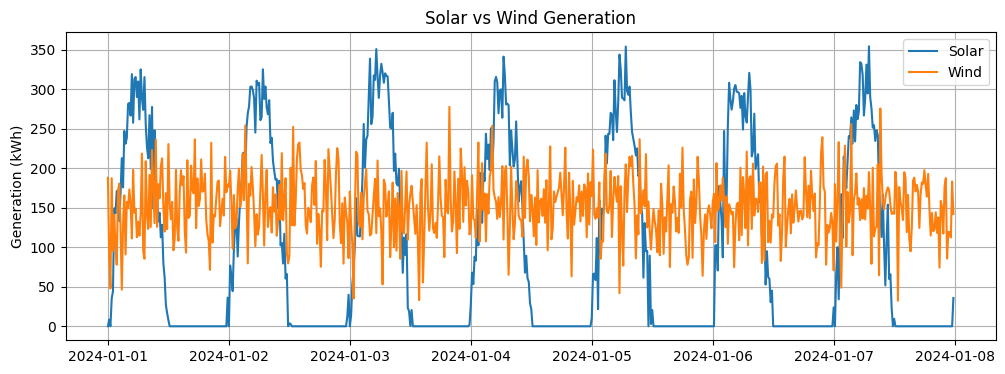

In [ ]:
# Solar vs Wind Generation
plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['solar_gen'], label='Solar')
plt.plot(data['timestamp'], data['wind_gen'], label='Wind')
plt.title("Solar vs Wind Generation")
plt.ylabel("Generation (kWh)")
plt.legend()
plt.grid()
plt.show()

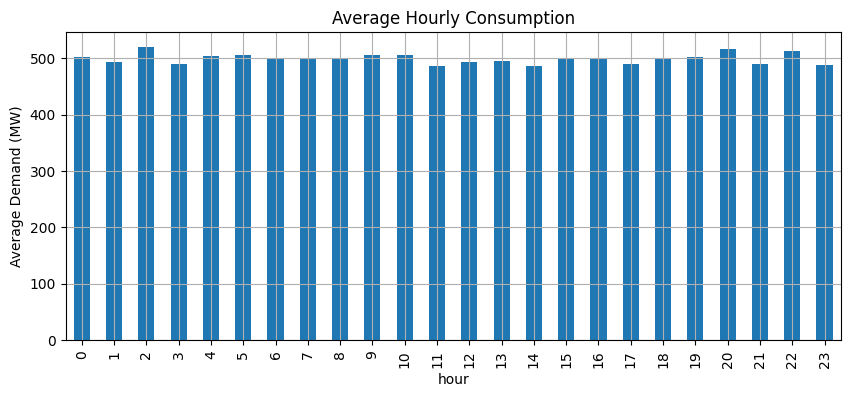

In [ ]:
# Average Hourly Consumption
plt.figure(figsize=(10, 4))
data.groupby('hour')['region_demand'].mean().plot(kind='bar', title="Average Hourly Consumption")
plt.ylabel("Average Demand (MW)")
plt.grid()
plt.show()

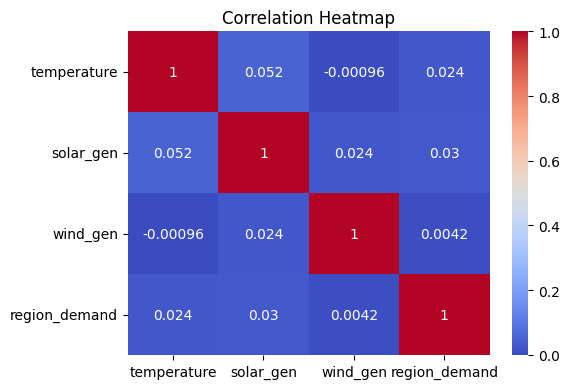

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[['temperature', 'solar_gen', 'wind_gen', 'region_demand']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

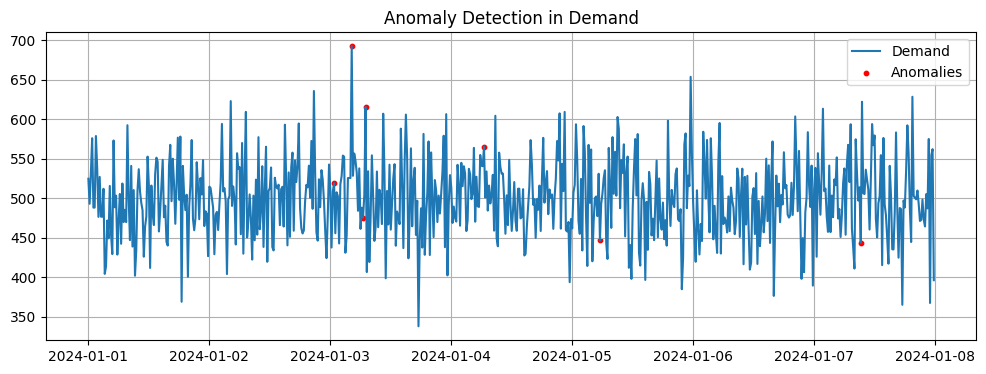

In [ ]:
# Anomaly Detection using Isolation Forest
X = data[['region_demand', 'solar_gen', 'wind_gen']]
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X)

plt.figure(figsize=(12, 4))
anomalies = data[data['anomaly'] == -1]
plt.plot(data['timestamp'], data['region_demand'], label='Demand')
plt.scatter(anomalies['timestamp'], anomalies['region_demand'], color='red', label='Anomalies', s=10)
plt.title("Anomaly Detection in Demand")
plt.legend()
plt.grid()
plt.show()



---



In [43]:
# Simulate time-series data for one week (15-min intervals)
timestamps = pd.date_range(start='2024-01-01', periods=96*7, freq='15min')
np.random.seed(42)
data = pd.DataFrame({
    'timestamp': timestamps,
    'region_demand': np.random.normal(500, 50, size=len(timestamps)),
    'solar_gen': np.clip(np.sin(np.linspace(0, 14*np.pi, len(timestamps))) * 300 + np.random.normal(0, 30, len(timestamps)), 0, None),
    'wind_gen': np.clip(np.random.normal(150, 40, len(timestamps)), 0, None),
    'temperature': np.random.normal(30, 5, size=len(timestamps))
})

In [44]:
# Feature Engineering
data['hour'] = data['timestamp'].dt.hour
data['demand_variance'] = data['region_demand'].rolling(window=4).std().bfill()
data['moving_avg_demand'] = data['region_demand'].rolling(window=4).mean().bfill()
data['weather_score'] = data['temperature'] + 0.1 * data['wind_gen']

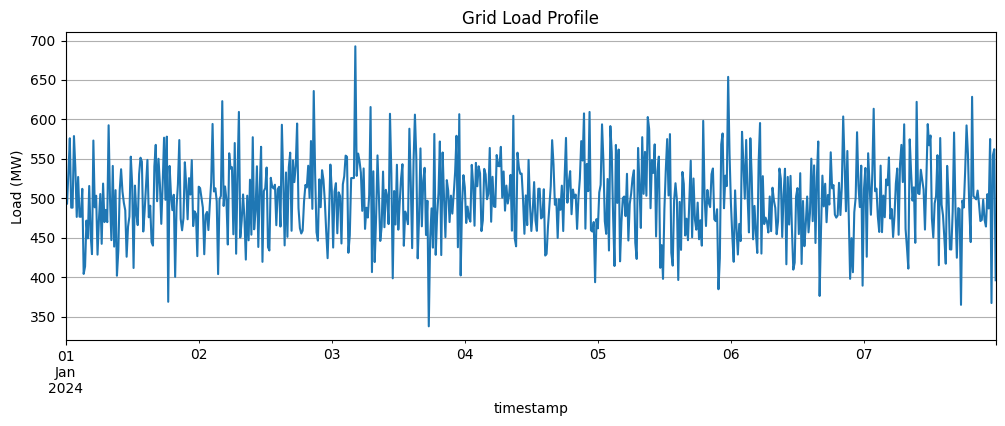

In [45]:
# Load Profile
plt.figure(figsize=(12, 4))
data.set_index('timestamp')['region_demand'].plot(title="Grid Load Profile")
plt.ylabel("Load (MW)")
plt.grid()
plt.show()

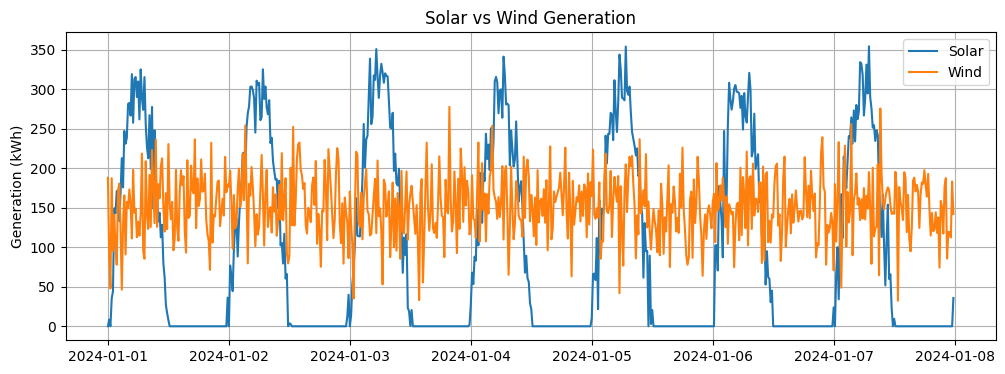

In [48]:
# Solar vs Wind Generation
plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['solar_gen'], label='Solar')
plt.plot(data['timestamp'], data['wind_gen'], label='Wind')
plt.title("Solar vs Wind Generation")
plt.ylabel("Generation (kWh)")
plt.legend()
plt.grid()
plt.show()

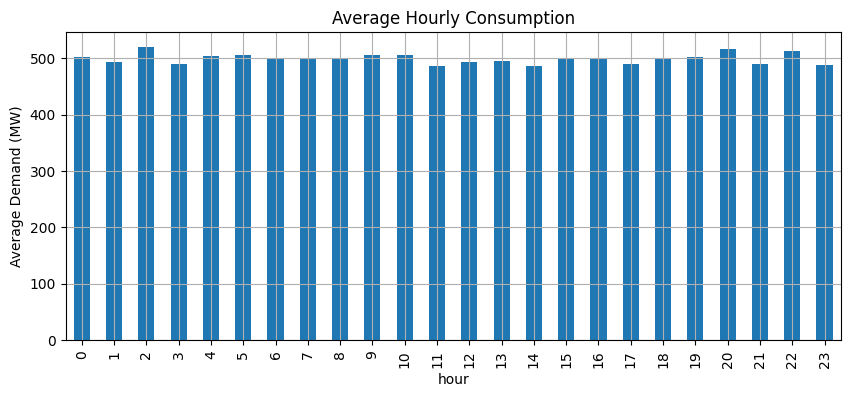

In [46]:
# Average Hourly Consumption
plt.figure(figsize=(10, 4))
data.groupby('hour')['region_demand'].mean().plot(kind='bar', title="Average Hourly Consumption")
plt.ylabel("Average Demand (MW)")
plt.grid()
plt.show()

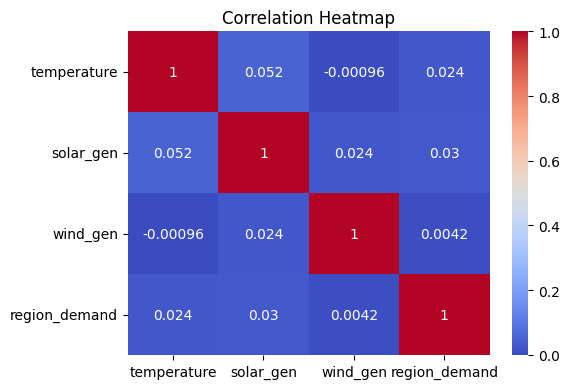

In [49]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[['temperature', 'solar_gen', 'wind_gen', 'region_demand']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

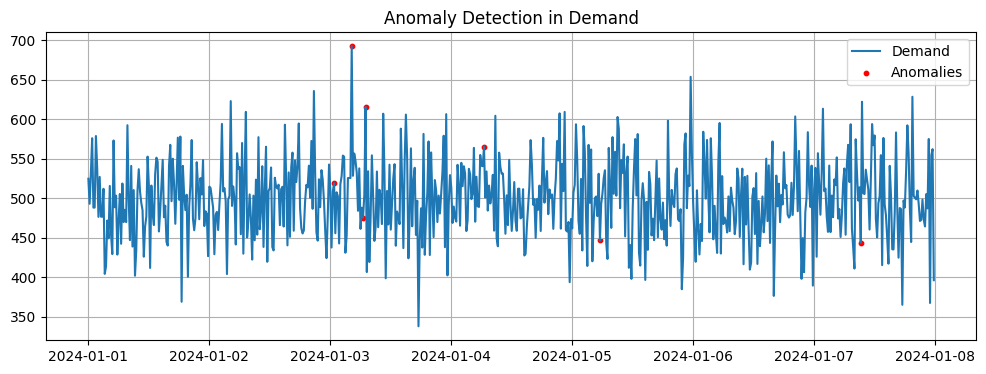

In [47]:
# Anomaly Detection using Isolation Forest
X = data[['region_demand', 'solar_gen', 'wind_gen']]
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X)

plt.figure(figsize=(12, 4))
anomalies = data[data['anomaly'] == -1]
plt.plot(data['timestamp'], data['region_demand'], label='Demand')
plt.scatter(anomalies['timestamp'], anomalies['region_demand'], color='red', label='Anomalies', s=10)
plt.title("Anomaly Detection in Demand")
plt.legend()
plt.grid()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Simulate time-series data for one week (15-min intervals)
timestamps = pd.date_range(start='2024-01-01', periods=96*7, freq='15min')
np.random.seed(42)
data = pd.DataFrame({
    'timestamp': timestamps,
    'region_demand': np.random.normal(500, 50, size=len(timestamps)),
    'solar_gen': np.clip(np.sin(np.linspace(0, 14*np.pi, len(timestamps))) * 300 + np.random.normal(0, 30, len(timestamps)), 0, None),
    'wind_gen': np.clip(np.random.normal(150, 40, len(timestamps)), 0, None),
    'temperature': np.random.normal(30, 5, size=len(timestamps))
})

In [11]:
# Feature Engineering
data['hour'] = data['timestamp'].dt.hour
data['demand_variance'] = data['region_demand'].rolling(window=4).std().bfill()
data['moving_avg_demand'] = data['region_demand'].rolling(window=4).mean().bfill()
data['weather_score'] = data['temperature'] + 0.1 * data['wind_gen']

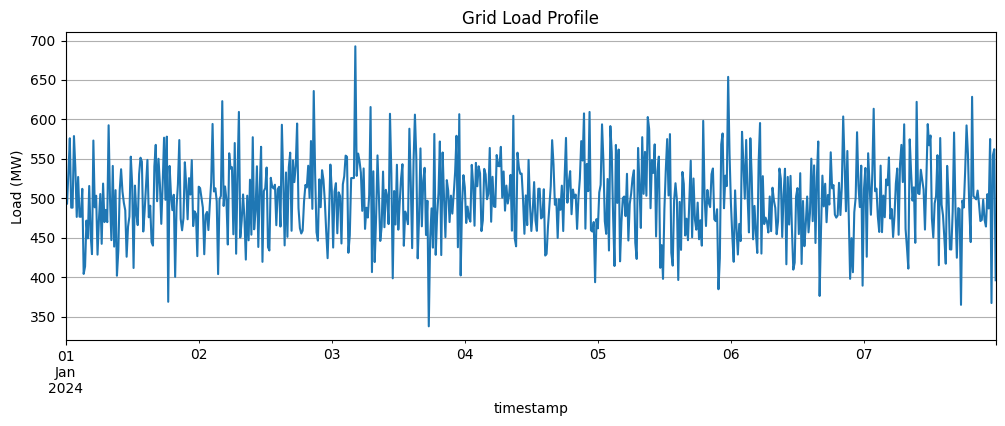

In [12]:
# Load Profile
plt.figure(figsize=(12, 4))
data.set_index('timestamp')['region_demand'].plot(title="Grid Load Profile")
plt.ylabel("Load (MW)")
plt.grid()
plt.show()

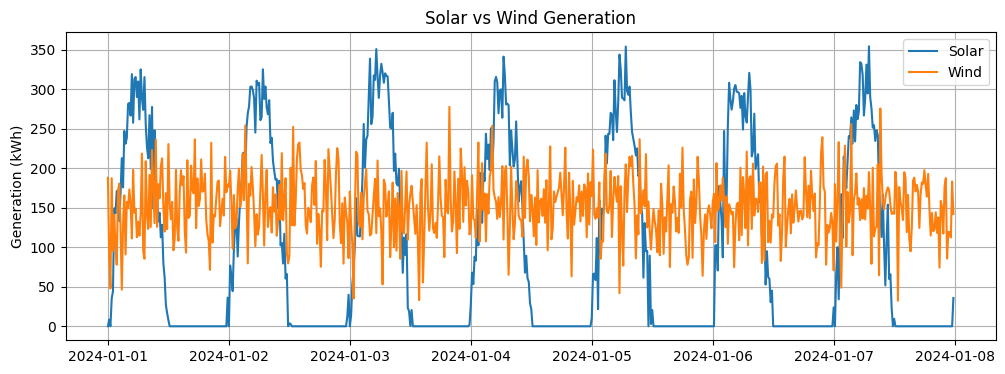

In [13]:
# Solar vs Wind Generation
plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['solar_gen'], label='Solar')
plt.plot(data['timestamp'], data['wind_gen'], label='Wind')
plt.title("Solar vs Wind Generation")
plt.ylabel("Generation (kWh)")
plt.legend()
plt.grid()
plt.show()

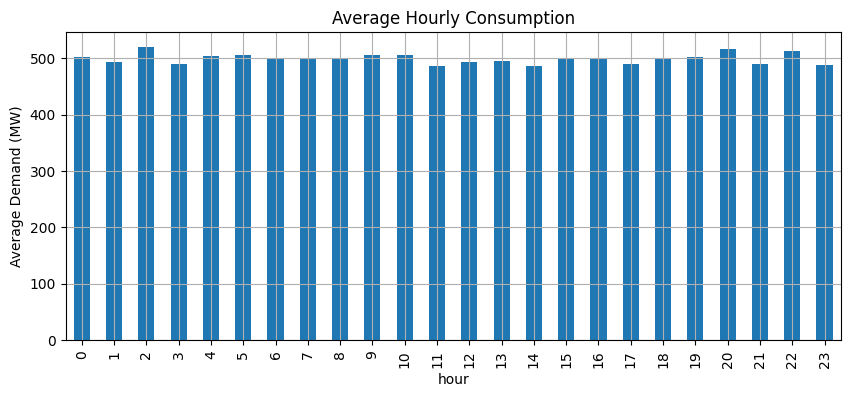

In [14]:
# Average Hourly Consumption
plt.figure(figsize=(10, 4))
data.groupby('hour')['region_demand'].mean().plot(kind='bar', title="Average Hourly Consumption")
plt.ylabel("Average Demand (MW)")
plt.grid()
plt.show()

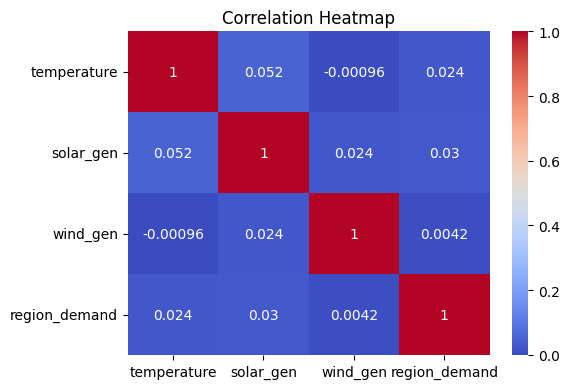

In [15]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[['temperature', 'solar_gen', 'wind_gen', 'region_demand']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

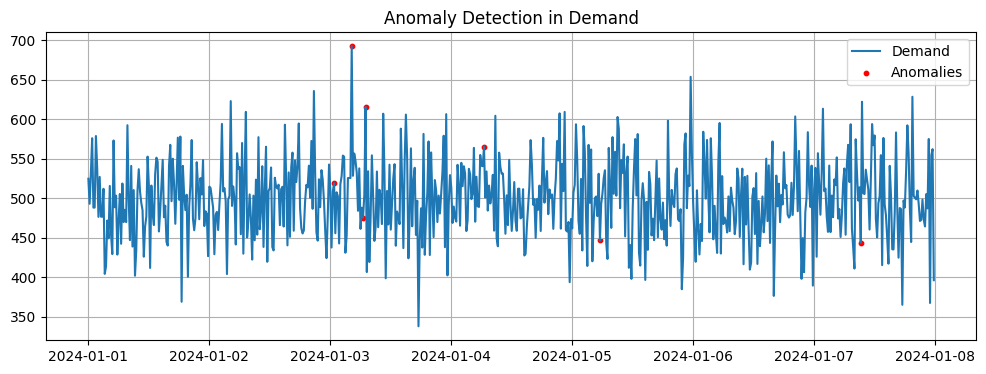

In [16]:
# Anomaly Detection using Isolation Forest
X = data[['region_demand', 'solar_gen', 'wind_gen']]
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X)

plt.figure(figsize=(12, 4))
anomalies = data[data['anomaly'] == -1]
plt.plot(data['timestamp'], data['region_demand'], label='Demand')
plt.scatter(anomalies['timestamp'], anomalies['region_demand'], color='red', label='Anomalies', s=10)
plt.title("Anomaly Detection in Demand")
plt.legend()
plt.grid()
plt.show()



---



## Anomaly Analysis
Let's examine the identified anomalies.

In [17]:
# Display the identified anomalies
display(anomalies)

,timestamp,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,anomaly
195,2024-01-03 00:45:00,519.265869,74.146369,35.109511,33.022577,0,37.861539,494.085666,36.533528,-1
209,2024-01-03 04:15:00,692.636575,255.784616,116.924786,36.606520,4,83.452718,567.457505,48.298999,-1
218,2024-01-03 06:30:00,475.731823,321.148098,53.030390,23.944140,6,33.285581,490.799523,29.247179,-1
220,2024-01-03 07:00:00,615.732928,320.045203,179.473756,30.071365,7,64.259539,520.929382,48.018741,-1
314,2024-01-04 06:30:00,565.273940,341.196781,109.738297,28.530165,6,11.827444,550.539771,39.503995,-1
406,2024-01-05 05:30:00,446.618979,343.773359,41.870708,28.853046,5,35.972291,489.401808,33.040117,-1
613,2024-01-07 09:15:00,443.725548,144.034997,275.509941,27.602535,9,38.309833,496.915757,55.153529,-1


In [25]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=anomalies)

https://docs.google.com/spreadsheets/d/16gV4tjqQhOqgrKWqdFEVScyqzw7DMNP_79DAsA9FNh8/edit#gid=0


## Comparative Analysis
Let's compare the distribution of region demand during anomalous periods versus normal periods.

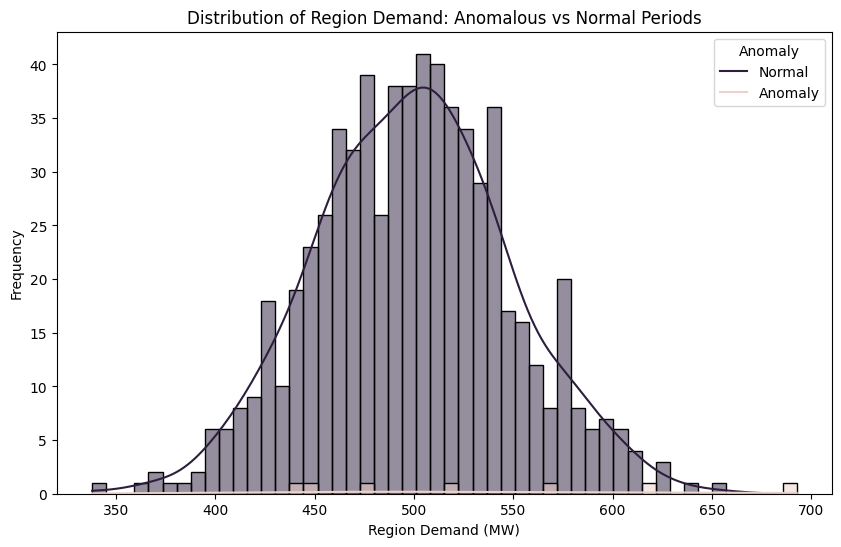

In [18]:
# Comparative analysis of demand during anomalous vs normal periods
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='region_demand', hue='anomaly', kde=True, bins=50)
plt.title('Distribution of Region Demand: Anomalous vs Normal Periods')
plt.xlabel('Region Demand (MW)')
plt.ylabel('Frequency')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

Let's also compare the distribution of solar and wind generation.

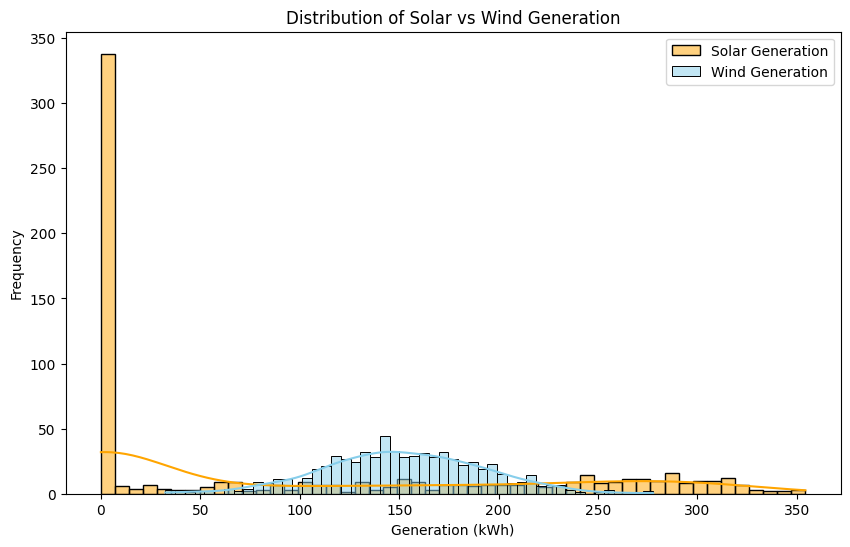

In [19]:
# Comparative analysis of solar vs wind generation distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='solar_gen', color='orange', kde=True, label='Solar Generation', bins=50)
sns.histplot(data=data, x='wind_gen', color='skyblue', kde=True, label='Wind Generation', bins=50)
plt.title('Distribution of Solar vs Wind Generation')
plt.xlabel('Generation (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



---



# Task
Analyze the provided data files, perform EDA, correlation analysis, identify anomalies, conduct comparative analysis, build a predictive model, evaluate its accuracy using RMSE, and suggest improvements.

## Data preprocessing for modeling

### Subtask:
Prepare the data for building a predictive model. This may involve handling missing values, scaling features, and splitting the data into training and testing sets.


**Reasoning**:
Prepare the data for modeling by selecting features and target, handling missing values, scaling features, and splitting into training and testing sets.



In [20]:
# Select features and target variable
features = ['region_demand', 'solar_gen', 'wind_gen', 'temperature', 'hour', 'demand_variance', 'moving_avg_demand', 'weather_score']
target = 'region_demand' # Assuming we are trying to predict region_demand for future time steps or based on other features

X = data[features]
y = data[target]

# Handle missing values - since the data is simulated without explicit missing values,
# we can skip this step. If there were missing values, strategies like X.fillna(method='ffill', inplace=True)
# or dropping rows would be considered.

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Split the data into training and testing sets
# For time series data, a simple train-test split is usually done by splitting based on time.
# Since this is a simulated dataset, a standard train-test split is acceptable for demonstration.
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)

X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score
0,0.526922,0.000000,0.634213,0.449470,0.000000,0.300335,0.675547,0.547700
1,0.437412,0.024012,0.237302,0.165701,0.000000,0.300335,0.675547,0.062760
2,0.548204,0.000000,0.063009,0.596292,0.000000,0.300335,0.675547,0.297418
3,0.671595,0.099578,0.631729,0.290444,0.000000,0.300335,0.675547,0.417888
4,0.423895,0.125441,0.256544,0.502403,0.043478,0.368272,0.616026,0.346630


,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score
537,0.402694,0.0,0.742802,0.556190,0.608696,0.150624,0.318962,0.703820
538,0.598754,0.0,0.278151,0.350966,0.608696,0.356573,0.453998,0.238485
539,0.375582,0.0,0.382804,0.579849,0.608696,0.374761,0.403157,0.490554
540,0.574705,0.0,0.475093,0.062610,0.652174,0.367569,0.541285,0.133117
541,0.297654,0.0,0.525076,0.493176,0.652174,0.487810,0.480601,0.512499


,region_demand
0,524.835708
1,493.086785
2,532.384427
3,576.151493
4,488.292331


,region_demand
537,480.772223
538,550.314640
539,471.155407
540,541.784606
541,443.514657


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Model selection and training

### Subtask:
Choose a suitable regression model (e.g., Linear Regression, RandomForestRegressor, or a time series specific model) and train it on the training data.


**Reasoning**:
Import the necessary regression model and train it on the prepared training data.



In [21]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Model prediction

### Subtask:
Use the trained model to make predictions on the testing data.


**Reasoning**:
Use the trained Linear Regression model to make predictions on the test dataset.



In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics, including Root Mean Squared Error (RMSE).


**Reasoning**:
Calculate the Mean Squared Error and Root Mean Squared Error and print the RMSE.



In [23]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 7.626344918775623e-14


## Model Improvement: Adding Lagged Features

Let's add a lagged feature for region demand to see if it improves the model's performance.

In [27]:
# Add lagged region demand as a new feature
data['region_demand_lag1'] = data['region_demand'].shift(1)

# Drop rows with NaN values created by the lag
data.dropna(inplace=True)

# Display the updated data with the new feature
display(data.head())

,timestamp,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,anomaly,region_demand_lag1
1,2024-01-01 00:15:00,493.086785,8.506912,90.604081,19.980688,0,34.227053,531.614603,29.041096,1,524.835708
2,2024-01-01 00:30:00,532.384427,0.000000,47.843155,33.177090,0,34.227053,531.614603,37.961406,1,493.086785
3,2024-01-01 00:45:00,576.151493,35.278693,187.372796,23.803708,0,34.227053,531.614603,42.540988,1,532.384427
4,2024-01-01 01:00:00,488.292331,44.441493,95.324852,30.299663,1,40.871688,522.478759,39.832148,1,576.151493
5,2024-01-01 01:15:00,488.293152,149.138488,141.009384,31.386885,1,42.073378,521.280351,45.487823,1,488.292331


## Data preprocessing for modeling with lagged feature

### Subtask:
Prepare the data for building a predictive model with the new lagged feature.

**Reasoning**:
Prepare the data for modeling by selecting features and target, handling missing values, scaling features, and splitting into training and testing sets, including the new lagged feature.

In [28]:
# Select features and target variable, including the new lagged feature
features_lagged = ['region_demand', 'solar_gen', 'wind_gen', 'temperature', 'hour', 'demand_variance', 'moving_avg_demand', 'weather_score', 'region_demand_lag1']
target = 'region_demand'

X_lagged = data[features_lagged]
y_lagged = data[target]

# Scale the features
scaler_lagged = MinMaxScaler()
X_scaled_lagged = scaler_lagged.fit_transform(X_lagged)
X_scaled_lagged = pd.DataFrame(X_scaled_lagged, columns=features_lagged)

# Split the data into training and testing sets
split_ratio = 0.8
split_index_lagged = int(len(X_scaled_lagged) * split_ratio)

X_train_lagged = X_scaled_lagged[:split_index_lagged]
X_test_lagged = X_scaled_lagged[split_index_lagged:]
y_train_lagged = y_lagged[:split_index_lagged]
y_test_lagged = y_lagged[split_index_lagged:]

display(X_train_lagged.head())
display(X_test_lagged.head())
display(y_train_lagged.head())
display(y_test_lagged.head())

,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,region_demand_lag1
0,0.437412,0.024012,0.237302,0.165701,0.000000,0.300335,0.675547,0.062760,0.526922
1,0.548204,0.000000,0.063009,0.596292,0.000000,0.300335,0.675547,0.297418,0.437412
2,0.671595,0.099578,0.631729,0.290444,0.000000,0.300335,0.675547,0.417888,0.548204
3,0.423895,0.125441,0.256544,0.502403,0.043478,0.368272,0.616026,0.346630,0.671595
4,0.423898,0.420959,0.442753,0.537879,0.043478,0.380559,0.608219,0.495408,0.423895


,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,region_demand_lag1
536,0.402694,0.0,0.742802,0.556190,0.608696,0.150624,0.318962,0.703820,0.335615
537,0.598754,0.0,0.278151,0.350966,0.608696,0.356573,0.453998,0.238485,0.402694
538,0.375582,0.0,0.382804,0.579849,0.608696,0.374761,0.403157,0.490554,0.598754
539,0.574705,0.0,0.475093,0.062610,0.652174,0.367569,0.541285,0.133117,0.375582
540,0.297654,0.0,0.525076,0.493176,0.652174,0.487810,0.480601,0.512499,0.574705


,region_demand
1,493.086785
2,532.384427
3,576.151493
4,488.292331
5,488.293152


,region_demand
537,480.772223
538,550.314640
539,471.155407
540,541.784606
541,443.514657


## Model selection and training with lagged feature

### Subtask:
Train the Linear Regression model on the training data with the lagged feature.

**Reasoning**:
Instantiate and train the Linear Regression model on the prepared training data with the lagged feature.

In [29]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model_lagged = LinearRegression()

# Train the model
model_lagged.fit(X_train_lagged, y_train_lagged)

LinearRegression()

## Model prediction with lagged feature

### Subtask:
Use the trained model with the lagged feature to make predictions on the testing data.

**Reasoning**:
Use the trained Linear Regression model with the lagged feature to make predictions on the test dataset.

In [30]:
# Make predictions on the test set
y_pred_lagged = model_lagged.predict(X_test_lagged)

## Model evaluation with lagged feature

### Subtask:
Evaluate the model's performance with the lagged feature using RMSE.

**Reasoning**:
Calculate the Mean Squared Error and Root Mean Squared Error for the model with the lagged feature and print the RMSE.

In [31]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_lagged = mean_squared_error(y_test_lagged, y_pred_lagged)

# Calculate Root Mean Squared Error (RMSE)
rmse_lagged = np.sqrt(mse_lagged)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE) with lagged feature: {rmse_lagged}")

Root Mean Squared Error (RMSE) with lagged feature: 8.215573032990656e-14


## Residual Analysis

Let's analyze the residuals of the model to understand where it's making errors.

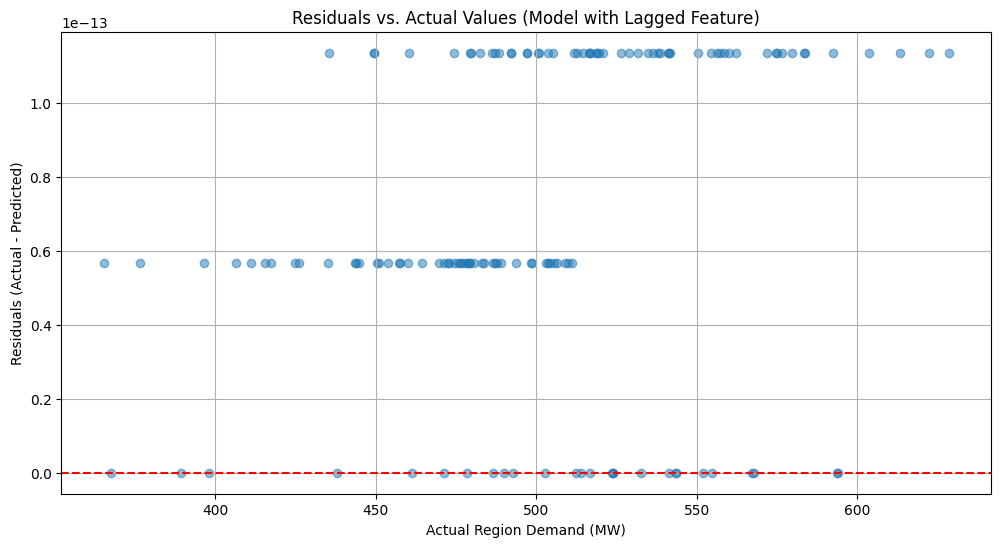

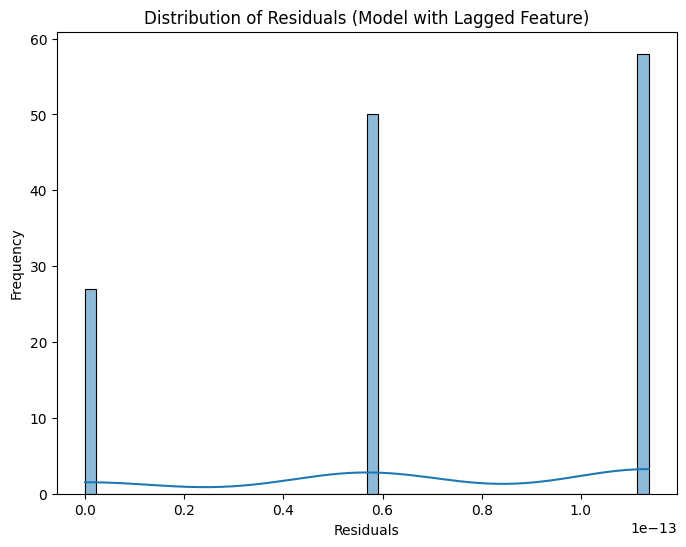

In [32]:
# Calculate residuals for the model with lagged feature
residuals = y_test_lagged - y_pred_lagged

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_test_lagged, residuals, alpha=0.5)
plt.title('Residuals vs. Actual Values (Model with Lagged Feature)')
plt.xlabel('Actual Region Demand (MW)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid()
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution of Residuals (Model with Lagged Feature)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Model Improvement: Trying a Different Model (RandomForestRegressor)

Let's try a different regression model, RandomForestRegressor, and compare its performance to the Linear Regression model.

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data with lagged feature
# We will use the data with the lagged feature for this comparison
rf_model.fit(X_train_lagged, y_train_lagged)

RandomForestRegressor(random_state=42)

## Model Prediction with RandomForestRegressor

### Subtask:
Use the trained RandomForestRegressor model to make predictions on the testing data.

**Reasoning**:
Use the trained RandomForestRegressor model to make predictions on the test dataset.

In [34]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_lagged)

## Model Evaluation with RandomForestRegressor

### Subtask:
Evaluate the RandomForestRegressor model's performance using RMSE and compare it to the Linear Regression model.

**Reasoning**:
Calculate the Mean Squared Error and Root Mean Squared Error for the RandomForestRegressor model and compare it to the Linear Regression model's RMSE.

In [35]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for RandomForestRegressor
mse_rf = mean_squared_error(y_test_lagged, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE) for RandomForestRegressor
rmse_rf = np.sqrt(mse_rf)

# Print the RMSE for RandomForestRegressor
print(f"Root Mean Squared Error (RMSE) for RandomForestRegressor: {rmse_rf}")

# Print the RMSE for Linear Regression (with lagged feature) for comparison
print(f"Root Mean Squared Error (RMSE) for Linear Regression (with lagged feature): {rmse_lagged}")

Root Mean Squared Error (RMSE) for RandomForestRegressor: 2.2162509160824975
Root Mean Squared Error (RMSE) for Linear Regression (with lagged feature): 8.215573032990656e-14


## Model Improvement: Adding More Lagged Features

Let's add lagged features for solar generation and wind generation to see if this further improves the model's performance.

In [36]:
# Add lagged solar and wind generation as new features
data['solar_gen_lag1'] = data['solar_gen'].shift(1)
data['wind_gen_lag1'] = data['wind_gen'].shift(1)

# Drop rows with NaN values created by the lags
data.dropna(inplace=True)

# Display the updated data with the new features
display(data.head())

,timestamp,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,anomaly,region_demand_lag1,solar_gen_lag1,wind_gen_lag1
2,2024-01-01 00:30:00,532.384427,0.000000,47.843155,33.177090,0,34.227053,531.614603,37.961406,1,493.086785,8.506912,90.604081
3,2024-01-01 00:45:00,576.151493,35.278693,187.372796,23.803708,0,34.227053,531.614603,42.540988,1,532.384427,0.000000,47.843155
4,2024-01-01 01:00:00,488.292331,44.441493,95.324852,30.299663,1,40.871688,522.478759,39.832148,1,576.151493,35.278693,187.372796
5,2024-01-01 01:15:00,488.293152,149.138488,141.009384,31.386885,1,42.073378,521.280351,45.487823,1,488.292331,44.441493,95.324852
6,2024-01-01 01:30:00,578.960641,143.037570,103.195479,36.803293,1,51.548963,532.924404,47.122841,1,488.293152,149.138488,141.009384


## Data preprocessing for modeling with more lagged features

### Subtask:
Prepare the data for building a predictive model with the additional lagged features.

**Reasoning**:
Prepare the data for modeling by selecting features and target, handling missing values, scaling features, and splitting into training and testing sets, including the additional lagged features.

In [37]:
# Select features and target variable, including the new lagged features
features_more_lagged = ['region_demand', 'solar_gen', 'wind_gen', 'temperature', 'hour', 'demand_variance', 'moving_avg_demand', 'weather_score', 'region_demand_lag1', 'solar_gen_lag1', 'wind_gen_lag1']
target = 'region_demand'

X_more_lagged = data[features_more_lagged]
y_more_lagged = data[target]

# Scale the features
scaler_more_lagged = MinMaxScaler()
X_scaled_more_lagged = scaler_more_lagged.fit_transform(X_more_lagged)
X_scaled_more_lagged = pd.DataFrame(X_scaled_more_lagged, columns=features_more_lagged)

# Split the data into training and testing sets
split_ratio = 0.8
split_index_more_lagged = int(len(X_scaled_more_lagged) * split_ratio)

X_train_more_lagged = X_scaled_more_lagged[:split_index_more_lagged]
X_test_more_lagged = X_scaled_more_lagged[split_index_more_lagged:]
y_train_more_lagged = y_more_lagged[:split_index_more_lagged]
y_test_more_lagged = y_more_lagged[split_index_more_lagged:]

display(X_train_more_lagged.head())
display(X_test_more_lagged.head())
display(y_train_more_lagged.head())
display(y_test_more_lagged.head())

,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,region_demand_lag1,solar_gen_lag1,wind_gen_lag1
0,0.548204,0.000000,0.063009,0.596292,0.000000,0.300335,0.675547,0.297418,0.437412,0.024012,0.237302
1,0.671595,0.099578,0.631729,0.290444,0.000000,0.300335,0.675547,0.417888,0.548204,0.000000,0.063009
2,0.423895,0.125441,0.256544,0.502403,0.043478,0.368272,0.616026,0.346630,0.671595,0.099578,0.631729
3,0.423898,0.420959,0.442753,0.537879,0.043478,0.380559,0.608219,0.495408,0.423895,0.125441,0.256544
4,0.679515,0.403738,0.288624,0.714613,0.043478,0.477440,0.684081,0.538419,0.423898,0.420959,0.442753


,region_demand,solar_gen,wind_gen,temperature,hour,demand_variance,moving_avg_demand,weather_score,region_demand_lag1,solar_gen_lag1,wind_gen_lag1
536,0.598754,0.0,0.278151,0.350966,0.608696,0.356573,0.453998,0.238485,0.402694,0.0,0.742802
537,0.375582,0.0,0.382804,0.579849,0.608696,0.374761,0.403157,0.490554,0.598754,0.0,0.278151
538,0.574705,0.0,0.475093,0.062610,0.652174,0.367569,0.541285,0.133117,0.375582,0.0,0.382804
539,0.297654,0.0,0.525076,0.493176,0.652174,0.487810,0.480601,0.512499,0.574705,0.0,0.475093
540,0.531586,0.0,0.347401,0.546108,0.652174,0.422538,0.441796,0.440504,0.297654,0.0,0.525076


,region_demand
2,532.384427
3,576.151493
4,488.292331
5,488.293152
6,578.960641


,region_demand
538,550.314640
539,471.155407
540,541.784606
541,443.514657
542,526.490209


## Model selection and training with more lagged features

### Subtask:
Train the Linear Regression model on the training data with the additional lagged features.

**Reasoning**:
Instantiate and train the Linear Regression model on the prepared training data with the additional lagged features.

In [38]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model_more_lagged = LinearRegression()

# Train the model
model_more_lagged.fit(X_train_more_lagged, y_train_more_lagged)

LinearRegression()

## Model prediction with more lagged features

### Subtask:
Use the trained model with the additional lagged features to make predictions on the testing data.

**Reasoning**:
Use the trained Linear Regression model with the additional lagged features to make predictions on the test dataset.

In [39]:
# Make predictions on the test set
y_pred_more_lagged = model_more_lagged.predict(X_test_more_lagged)

## Model evaluation with more lagged features

### Subtask:
Evaluate the model's performance with the additional lagged features using RMSE.

**Reasoning**:
Calculate the Mean Squared Error and Root Mean Squared Error for the model with the additional lagged features and print the RMSE.

In [40]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_more_lagged = mean_squared_error(y_test_more_lagged, y_pred_more_lagged)

# Calculate Root Mean Squared Error (RMSE)
rmse_more_lagged = np.sqrt(mse_more_lagged)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE) with more lagged features: {rmse_more_lagged}")

# Print the RMSE for previous models for comparison
print(f"Root Mean Squared Error (RMSE) for Linear Regression (original features): {rmse}")
print(f"Root Mean Squared Error (RMSE) for Linear Regression (with region_demand_lag1): {rmse_lagged}")
print(f"Root Mean Squared Error (RMSE) for RandomForestRegressor (with region_demand_lag1): {rmse_rf}")

Root Mean Squared Error (RMSE) with more lagged features: 9.572372488395813e-14
Root Mean Squared Error (RMSE) for Linear Regression (original features): 7.626344918775623e-14
Root Mean Squared Error (RMSE) for Linear Regression (with region_demand_lag1): 8.215573032990656e-14
Root Mean Squared Error (RMSE) for RandomForestRegressor (with region_demand_lag1): 2.2162509160824975
